# Testing Pretrained Word Models


In [1]:
#import packages
import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from collections import Counter
import requests
from bs4 import BeautifulSoup
import nltk
import re
import spacy
from nltk.tokenize import RegexpTokenizer, TreebankWordTokenizer, WordPunctTokenizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import numpy as np
import pandas as pd
from nltk.tokenize import word_tokenize

In [3]:
from nltk.tokenize import sent_tokenize

# importing shakespeare's caesar text from nltk
nltk.download('gutenberg')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

from nltk.corpus import gutenberg
text = gutenberg.raw('austen-emma.txt')
print(text[:1000])

def preprocess_text(text):
    # Remove metadata or headers in brackets
    text = re.sub(r'\[.*?\]', '', text)

    #convert to lowercase
    text = text.lower()

    # Split text into sentences
    sentences = nltk.sent_tokenize(text)

    # Filter out very short sentences that don’t provide much context
    sentences = [sentence for sentence in sentences if len(sentence.split()) > 5]

    return sentences

document = preprocess_text(text)
print(document[:10])



[Emma by Jane Austen 1816]

VOLUME I

CHAPTER I


Emma Woodhouse, handsome, clever, and rich, with a comfortable home
and happy disposition, seemed to unite some of the best blessings
of existence; and had lived nearly twenty-one years in the world
with very little to distress or vex her.

She was the youngest of the two daughters of a most affectionate,
indulgent father; and had, in consequence of her sister's marriage,
been mistress of his house from a very early period.  Her mother
had died too long ago for her to have more than an indistinct
remembrance of her caresses; and her place had been supplied
by an excellent woman as governess, who had fallen little short
of a mother in affection.

Sixteen years had Miss Taylor been in Mr. Woodhouse's family,
less as a governess than a friend, very fond of both daughters,
but particularly of Emma.  Between _them_ it was more the intimacy
of sisters.  Even before Miss Taylor had ceased to hold the nominal
office of governess, the mildness o

[nltk_data] Downloading package gutenberg to C:\Users\Kaushik
[nltk_data]     Srivatsan\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Kaushik
[nltk_data]     Srivatsan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Kaushik
[nltk_data]     Srivatsan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Kaushik
[nltk_data]     Srivatsan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### TF-IDF on Dataset

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer


vectorizer = TfidfVectorizer() # Create the TF-IDF vectorizer
tfidf_matrix = vectorizer.fit_transform(document)
feature_names = vectorizer.get_feature_names_out()
tfidf_values = {}

for doc_index, doc in enumerate(document):
	feature_index = tfidf_matrix[doc_index, :].nonzero()[1]
	tfidf_doc_values = zip(feature_index, [tfidf_matrix[doc_index, x] for x in feature_index])
	tfidf_values[doc_index] = {feature_names[i]: value for i, value in tfidf_doc_values}
#let's print
print('TF-IDF Values for 10 Samples:')
c = 0
for doc_index, values in tfidf_values.items():
	if c == 10:
		break
	c += 1
	print(f"Document {doc_index + 1}:")
	for word, tfidf_value in values.items():
		print(f"{word}: {tfidf_value}")
	print("\n")


TF-IDF Values for 10 Samples:
Document 1:
volume: 0.2474103696421591
chapter: 0.16998321977256517
emma: 0.09122892858639818
woodhouse: 0.12148810147525166
handsome: 0.18507333280892946
clever: 0.1910012724750823
and: 0.16062353453879186
rich: 0.20836486349710157
with: 0.1674938085830467
comfortable: 0.18507333280892946
home: 0.14549554857888236
happy: 0.1471840443897723
disposition: 0.1932747504607373
seemed: 0.14323944232820804
to: 0.10222033240770564
unite: 0.2474103696421591
some: 0.12525492586195255
of: 0.11149765763740564
the: 0.10811317552192742
best: 0.158185102096368
blessings: 0.2308789641996864
existence: 0.22345497653346585
had: 0.08045817705634815
lived: 0.19211614570930266
nearly: 0.20836486349710157
twenty: 0.18889032933953195
one: 0.11144466449942704
years: 0.1705252649710454
in: 0.06942030939975304
world: 0.15854756841669876
very: 0.08418498401270579
little: 0.116786170326917
distress: 0.2013817890083571
or: 0.10964941992795939
vex: 0.267886377146196
her: 0.071566972774

In [ ]:
# TF-IDF
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform()
print("TF-IDF Matrix (Normal):")
print(tfidf_matrix.toarray())

TF-IDF Matrix (Normal):
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [21]:
vectorizer = TfidfVectorizer(
    max_df=0.3,
    min_df=2,
    stop_words='english'
)
tfidf_matrix = vectorizer.fit_transform(document)
print("TF-IDF Matrix (Modified):")
print(tfidf_matrix.toarray())

TF-IDF Matrix (Modified):
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


### Co-Occurence Matrix on Dataset

In [5]:



def build_co_occurrence_matrix(corpus,window_size):
    #build unique words
    unique_words=set()
    for text in corpus:
        for word in word_tokenize(text):
            unique_words.add(word)

    word_search_dict={word:np.zeros(shape=(len(unique_words))) for word in unique_words}
    word_list=list(word_search_dict.keys())
    for text in corpus:
        text_list=word_tokenize(text)
        for idx,word in enumerate(text_list):
            #pick word in the size range
            i=max(0,idx-window_size)
            j=min(len(text_list)-1,idx+window_size)
            search=[text_list[idx_] for idx_ in range(i,j+1)]
            search.remove(word)
            for neighbor in search:
                # get neighbor idx in word_search_dict
                nei_idx=word_list.index(neighbor)
                word_search_dict[word][nei_idx]+=1
    return word_search_dict

coo_dict=build_co_occurrence_matrix(document,window_size=1)
pd.DataFrame(coo_dict,index=coo_dict.keys()).astype('int')

,evil,pursued,_philip_,latterly,answer,inherits,colour,nothing,blossom,supposed,...,otway,_white-hart_,skill,carries,bias,doating,assertion,secured.,using,difference
evil,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
pursued,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
_philip_,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
latterly,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
answer,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
doating,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
assertion,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
secured.,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
using,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# SVD to reduce the dimensionality of the matrix and get the word embeddings
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer

svd = TruncatedSVD(n_components=2)
lsa = make_pipeline(svd, Normalizer(copy=False))
X = lsa.fit_transform(list(coo_dict.values()))
pd.DataFrame(X, index=coo_dict.keys(), columns=['LSA1', 'LSA2']) # LSA - Latent Semantic Analysis


,LSA1,LSA2
evil,0.998653,0.051880
pursued,0.660583,0.750753
_philip_,0.571938,-0.820297
latterly,0.762710,0.646741
answer,0.849104,0.528226
...,...,...
doating,0.975585,-0.219624
assertion,0.660658,0.750687
secured.,0.784355,0.620312
using,0.920879,-0.389849


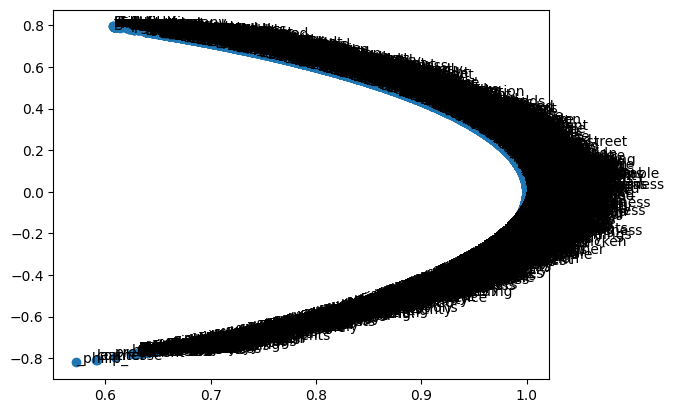

In [7]:
# plot the word embeddings
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1])

for word, (x, y) in zip(coo_dict.keys(), X):
    ax.text(x, y, word)

plt.show()


### Word2Vec on Dataset

In [8]:
print(document)

['\n\nvolume i\n\nchapter i\n\n\nemma woodhouse, handsome, clever, and rich, with a comfortable home\nand happy disposition, seemed to unite some of the best blessings\nof existence; and had lived nearly twenty-one years in the world\nwith very little to distress or vex her.', "she was the youngest of the two daughters of a most affectionate,\nindulgent father; and had, in consequence of her sister's marriage,\nbeen mistress of his house from a very early period.", 'her mother\nhad died too long ago for her to have more than an indistinct\nremembrance of her caresses; and her place had been supplied\nby an excellent woman as governess, who had fallen little short\nof a mother in affection.', "sixteen years had miss taylor been in mr. woodhouse's family,\nless as a governess than a friend, very fond of both daughters,\nbut particularly of emma.", 'between _them_ it was more the intimacy\nof sisters.', "even before miss taylor had ceased to hold the nominal\noffice of governess, the mild

In [10]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import nltk

def preprocess_text(corpus):
    stop_words = set(stopwords.words('english'))
    tokenized_sentences = []
    for sentence in corpus:
        tokens = word_tokenize(sentence.lower())
        filtered_tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
        tokenized_sentences.append(filtered_tokens)
    return tokenized_sentences

document_tokenized = preprocess_text(document)

# Train the Skip-Gram model
skipgram_model = Word2Vec(sentences=document_tokenized,
                          vector_size=100,  # Dimensionality of the word vectors
                          window=5,         # Maximum distance between the current and predicted word within a sentence
                          sg=1,             # Skip-Gram model (1 for Skip-Gram, 0 for CBOW)
                          min_count=1)     # Ignores all words with a total frequency lower than this
                          #workers=4)        # Number of CPU cores to use for training the model

# Training
skipgram_model.train(document_tokenized, total_examples=1, epochs=10)
skipgram_model.save("skipgram_model.model")
loaded_model = Word2Vec.load("skipgram_model.model")

word_to_check = 'softness'
if word_to_check in loaded_model.wv:
    vector_representation = loaded_model.wv[word_to_check]
    print(f"Vector representation of '{word_to_check}':", vector_representation)
else:
    print(f"The word '{word_to_check}' is not in the vocabulary.")

Vector representation of 'softness': [-0.09800255  0.13853869  0.00806424 -0.10509291  0.11923628 -0.20014584
  0.00592174  0.39214745 -0.10687362 -0.05481855 -0.08395546 -0.29995418
 -0.05790512  0.0259489   0.16131409 -0.08098458  0.00192334 -0.2116686
 -0.09368648 -0.23482418  0.08801881  0.00420378  0.09281196 -0.04891295
 -0.08472741 -0.08080173 -0.14264019 -0.12353788 -0.16567928 -0.00062041
  0.19768701  0.03812765 -0.01723825 -0.13135856 -0.12947217  0.16793606
 -0.07975031 -0.19702716 -0.10787477 -0.3577688   0.00877736 -0.13209629
 -0.04780539 -0.05907426  0.19888397 -0.0612664  -0.08582585  0.09107376
  0.20633759  0.13125819  0.13847198 -0.19164345 -0.05728666 -0.02791609
 -0.11945509  0.06822272  0.06639329  0.01927417 -0.12973495  0.04176279
  0.14831334  0.04631497 -0.02039868 -0.08622434 -0.24006814  0.08458842
  0.07178801  0.14178339 -0.06944299  0.26444545 -0.03274101  0.07182291
  0.18570246 -0.04570369  0.22402881  0.01996088  0.03595076 -0.05952448
 -0.07659136  0

In [11]:
print(len(document_tokenized))
print(len(document))

6383
6383


In [12]:
def sentence_embedding(sentence, model):
    tokens = word_tokenize(sentence.lower())
    embeddings = [model.wv[word] for word in tokens if word in model.wv]

    if embeddings:
        return np.mean(embeddings, axis=0)
    else:
        return np.zeros(model.vector_size)


In [13]:
from sklearn.metrics.pairwise import cosine_similarity

def calculate_similarity(sentences, model):
    # Compute sentence embeddings
    embeddings = [sentence_embedding(sentence, model) for sentence in sentences]

    # Compute cosine similarity between pairs of sentences
    similarity_matrix = cosine_similarity(embeddings)

    # Find most similar sentence pairs
    most_similar_pairs = []
    for i in range(len(sentences)):
        for j in range(i + 1, len(sentences)):
            most_similar_pairs.append((i, j, similarity_matrix[i][j]))

    # Sort pairs by similarity score in descending order
    most_similar_pairs = sorted(most_similar_pairs, key=lambda x: x[2], reverse=True)

    return most_similar_pairs


In [14]:
# Calculate similarity
most_similar_pairs = calculate_similarity(document, skipgram_model)

# Display top 5 similar pairs
for i, j, score in most_similar_pairs[:10]:
    print(f"Sentence 1: {document[i]}")
    print(f"Sentence 2: {document[j]}")
    print(f"Cosine Similarity: {score:.4f}\n")


Sentence 1: it must, if i were not here.
Sentence 2: he must do it all himself.
Cosine Similarity: 1.0000

Sentence 1: can i do any thing for you?"
Sentence 2: can i do any thing for _you_?"
Cosine Similarity: 1.0000

Sentence 1: what do you think of him?
Sentence 2: you think so, do not you?"
Cosine Similarity: 1.0000

Sentence 1: "i have no doubt of it."
Sentence 2: "but what are you in doubt of?
Cosine Similarity: 1.0000

Sentence 1: "i have no doubt of it."
Sentence 2: are you
in any doubt as to that?
Cosine Similarity: 1.0000

Sentence 1: "but what are you in doubt of?
Sentence 2: are you
in any doubt as to that?
Cosine Similarity: 1.0000

Sentence 1: another view of man, my second brings,
      behold him there, the monarch of the seas!
Sentence 2: another view of man, my second brings;
      behold him there, the monarch of the seas!
Cosine Similarity: 1.0000

Sentence 1: "what can it be, miss woodhouse?--what can it be?
Sentence 2: miss woodhouse, what can we do about that?"
Co

### BERT model execution

In [47]:
pip install transformers torch scikit-learn


In [53]:
pip install -U sentence-transformers


In [112]:
from transformers import BertModel, BertTokenizer
import torch
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Load model and tokenizer and move model to GPU
device = 'cuda' if torch.cuda.is_available() else 'cpu'
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased').to(device)


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [113]:
def get_sentence_embeddings(sentences, batch_size=16):
    embeddings = []
    with torch.no_grad():  # No gradient tracking for inference
        for i in range(0, len(sentences), batch_size):
            batch = sentences[i:i+batch_size]
            inputs = tokenizer(batch, padding=True, truncation=True, return_tensors="pt").to(device)
            outputs = model(**inputs)
            # Use the embeddings from the [CLS] token
            batch_embeddings = outputs.last_hidden_state[:, 0, :].cpu().numpy()
            embeddings.extend(batch_embeddings)
    return np.array(embeddings)

In [114]:

# Get most similar pairs
sentence_embeddings = get_sentence_embeddings(document, batch_size=8)
similarities = cosine_similarity(sentence_embeddings)



In [115]:
# Find the most similar sentence pairs (excluding the diagonal)
threshold = 0.98
most_similar_pairs = []
for i in range(len(document)):
    for j in range(i + 1, len(document)):
        if similarities[i][j] < threshold:  # Filter out high similarity pairs
            most_similar_pairs.append((similarities[i][j], i, j))


# Sort pairs by similarity score in descending order
most_similar_pairs = sorted(most_similar_pairs, key=lambda x: x[0], reverse=True)

# Display the most similar sentence pairs
print("Most Similar Sentence Pairs using BERT:")
for score, i, j in most_similar_pairs[:10]:
    print(f"Sentence 1: {document[i]}")
    print(f"Sentence 2: {document[j]}")
    print(f"Cosine Similarity: {score:.4f}\n")


Most Similar Sentence Pairs using BERT:
Sentence 1: why should there be any change?"
Sentence 2: and how could it possibly come into your head?"
Cosine Similarity: 0.9796

Sentence 1: i am not
in the least ashamed of my meaning."
Sentence 2: i do not consider myself at all
a fortunate person."
Cosine Similarity: 0.9794

Sentence 1: i am sure they will bring him soon."
Sentence 2: i am sure she will be here presently."
Cosine Similarity: 0.9790

Sentence 1: i wish i were
anywhere else."
Sentence 2: i should be sorry to be more."
Cosine Similarity: 0.9787

Sentence 1: i must have given you up."
Sentence 2: it will be the only difference."
Cosine Similarity: 0.9785

Sentence 1: i should be sorry to be more."
Sentence 2: you never wrote a truer line."
Cosine Similarity: 0.9784

Sentence 1: he must have a pretty good opinion of himself."
Sentence 2: he seems perfectly
unprepared for that."
Cosine Similarity: 0.9782

Sentence 1: miss woodhouse, how ungrateful i have been!"
Sentence 2: miss w

### Performing Cosine Similarity of Sentences using Sentence Transformer

In [116]:
# Testing Sentence Transformer - modified for sentences using BERT. Sentence similarity can be done much faster.
from sentence_transformers import SentenceTransformer, util
import torch

# Load the model and move it to GPU if available
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model2 = SentenceTransformer('paraphrase-MiniLM-L6-v2').to(device)



# Compute embeddings in batches (Sentence Transformers does this automatically)
sentence_embeddings = model2.encode(document, batch_size=8, convert_to_tensor=True, device=device)

# Calculate cosine similarity matrix
cosine_similarities = util.cos_sim(sentence_embeddings, sentence_embeddings)

similarities = cosine_similarities.cpu().numpy()


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [118]:
# Find the most similar sentence pairs (excluding the diagonal)
threshold = 0.98
most_similar_pairs = []
for i in range(len(document)):
    for j in range(i + 1, len(document)):
        if similarities[i][j] < threshold:  # Filter out high similarity pairs
            most_similar_pairs.append((similarities[i][j], i, j))


# Sort pairs by similarity score in descending order
most_similar_pairs = sorted(most_similar_pairs, key=lambda x: x[0], reverse=True)

# Display the most similar sentence pairs
print("Most Similar Sentence Pairs using Sentence - Transformer:")
for score, i, j in most_similar_pairs[:20]:
    print(f"Sentence 1: {document[i]}")
    print(f"Sentence 2: {document[j]}")
    print(f"Cosine Similarity: {score:.4f}\n")


Most Similar Sentence Pairs using Sentence - Transformer:
Sentence 1: "i saw you first in february.
Sentence 2: i saw you first in february."
Cosine Similarity: 0.9797

Sentence 1: mr. elton is going
to be married."
Sentence 2: "mr. elton going to be married!"
Cosine Similarity: 0.9286

Sentence 1: i thought i had seen
you first in february."
Sentence 2: i saw you first in february."
Cosine Similarity: 0.9111

Sentence 1: i never saw such a likeness in my life.
Sentence 2: i never saw such
a likeness."
Cosine Similarity: 0.9106

Sentence 1: i thought i had seen
you first in february."
Sentence 2: "i saw you first in february.
Cosine Similarity: 0.9069

Sentence 1: "where could
you possibly hear it, mr. knightley?
Sentence 2: but, mr. knightley,
how could you possibly have heard it?
Cosine Similarity: 0.9049

Sentence 1: can i do any thing for you?"
Sentence 2: can i do any thing for _you_?"
Cosine Similarity: 0.9046

Sentence 1: he is a most amiable, charming young man,
i believe.
Sent